**#101**

In [ ]:
!pip -q install neurokit2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.2/689.2 kB 13.0 MB/s eta 0:00:00


In [ ]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt

**#101**

In [ ]:
read_file=pd.read_csv('/content/activity1.csv')
ecg_signal=read_file.iloc[:5000,2].values

In [ ]:
print(ecg_signal)
print(type(ecg_signal))

ecg_cleaned=nk.ecg_clean(ecg_signal, sampling_rate=1000, method='biosppy')

[-1.51527542 -1.52032393 -1.51491481 ... -1.62562151 -1.68548246
 -1.54917259]
<class 'numpy.ndarray'>


In [ ]:
ecg_cleaned=nk.ecg_clean(ecg_signal, sampling_rate=1000, method='biosppy')

In [ ]:
!pip -q install ts2vg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.3 MB/s eta 0:00:00


In [ ]:
ecg_cleaned=nk.ecg_clean(ecg_signal, sampling_rate=1000, method='vg')

In [ ]:
def band_pass_filter(signal):

    result = None
    sig = signal.copy()

    for i in range(len(signal)):
      sig[i] = signal[i]
      if (i >= 1):
        sig[i] += 2*sig[i-1]
      if (i >= 2):
        sig[i] -= sig[i-2]
      if (i >= 6):
        sig[i] -= 2*signal[i-6]
      if (i >= 12):
        sig[i] += signal[i-12]

    result = sig.copy()

    for i in range(len(signal)):
      result[i] = -1*sig[i]
      if (i >= 1):
        result[i] -= result[i-1]
      if (i >= 16):
        result[i] += 32*sig[i-16]
      if (i >= 32):
        result[i] += sig[i-32]
    max_val = max(max(result),-min(result))
    result = result/max_val
    return result

filtered=band_pass_filter(ecg_cleaned)

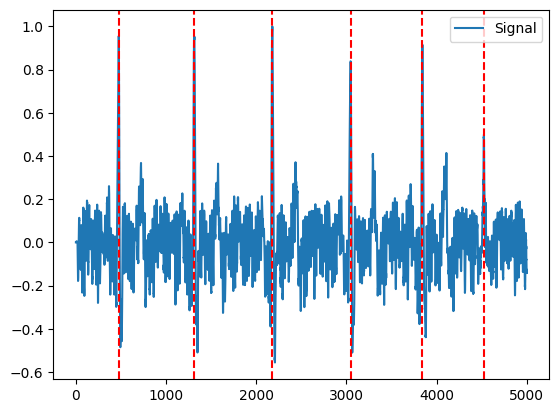

In [ ]:
_, emrich2023 = nk.ecg_peaks(filtered, sampling_rate=1000, method="emrich2023", height=0.8, distance=300)
plot = nk.events_plot(emrich2023['ECG_R_Peaks'], filtered)

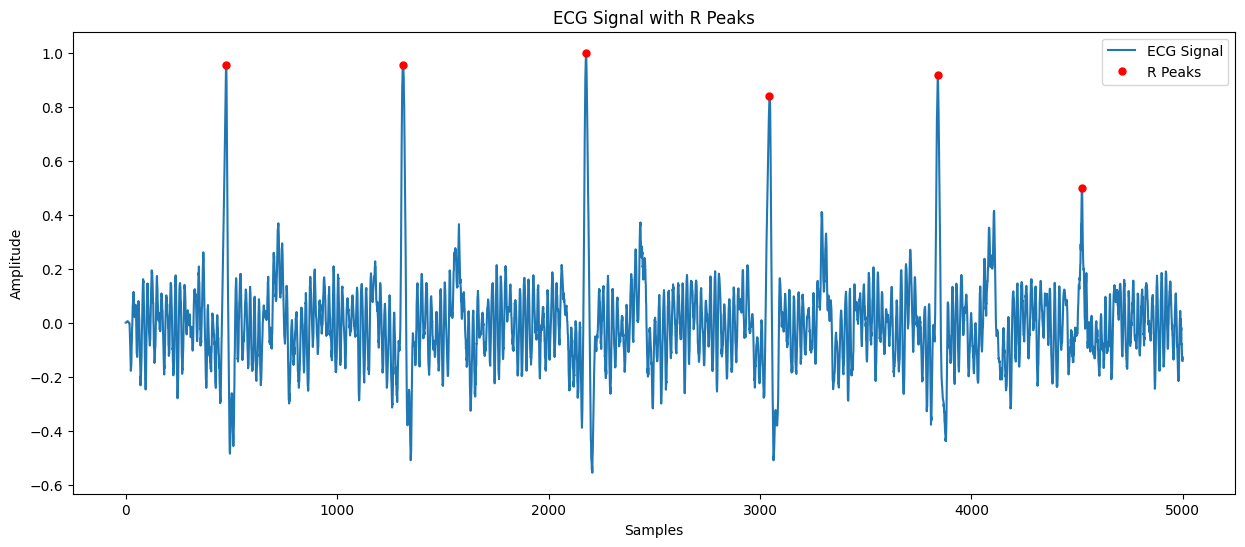

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(filtered, label='ECG Signal')

r_peaks = emrich2023['ECG_R_Peaks']
plt.plot(r_peaks, filtered[r_peaks], 'ro', markersize=5, label='R Peaks')

plt.title('ECG Signal with R Peaks')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
def band_pass_filter(signal):

    result = None
    sig = signal.copy()

    for i in range(len(signal)):
      sig[i] = signal[i]
      if (i >= 1):
        sig[i] += 2*sig[i-1]
      if (i >= 2):
        sig[i] -= sig[i-2]
      if (i >= 6):
        sig[i] -= 2*signal[i-6]
      if (i >= 12):
        sig[i] += signal[i-12]

    result = sig.copy()

    for i in range(len(signal)):
      result[i] = -1*sig[i]
      if (i >= 1):
        result[i] -= result[i-1]
      if (i >= 16):
        result[i] += 32*sig[i-16]
      if (i >= 32):
        result[i] += sig[i-32]
    max_val = max(max(result),-min(result))
    result = result/max_val
    return result

filtered=band_pass_filter(ecg_cleaned)


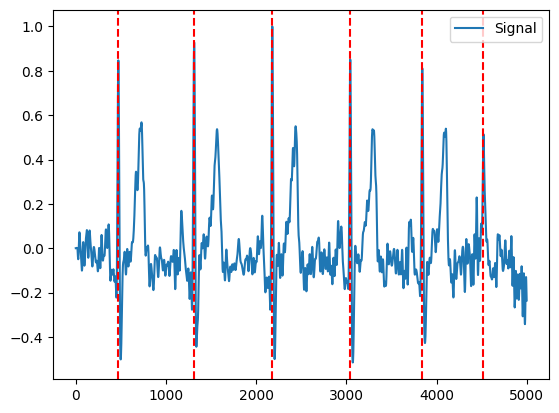

In [ ]:
_, emrich2023 = nk.ecg_peaks(filtered, sampling_rate=1200, method="emrich2023", height=0.8, distance=300)
plot = nk.events_plot(emrich2023['ECG_R_Peaks'], filtered)

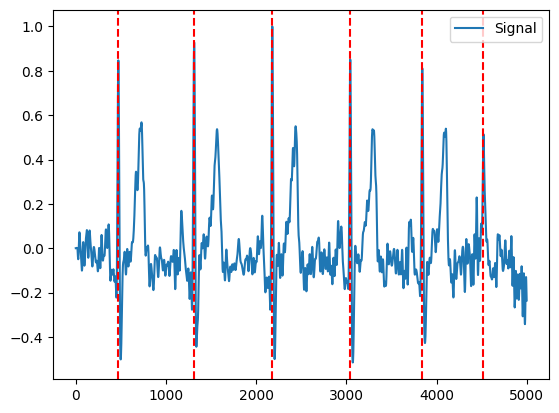

In [ ]:
_, emrich2023 = nk.ecg_peaks(filtered, sampling_rate=1200, method="emrich2023", height=0.8, distance=300)
plot = nk.events_plot(emrich2023['ECG_R_Peaks'], filtered)

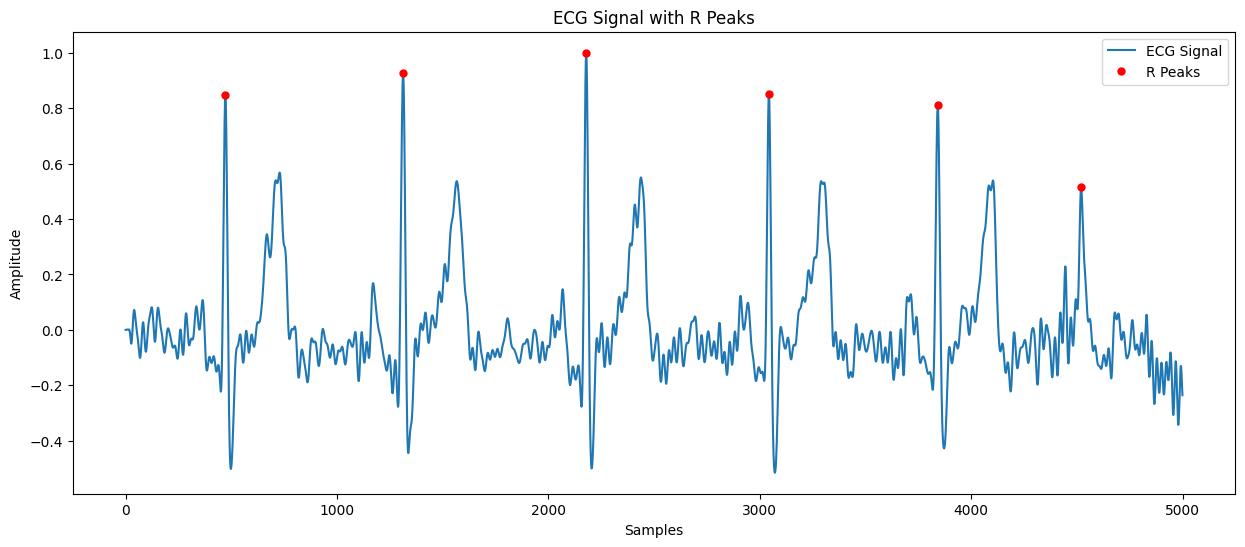

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(filtered, label='ECG Signal')

r_peaks = emrich2023['ECG_R_Peaks']
plt.plot(r_peaks, filtered[r_peaks], 'ro', markersize=5, label='R Peaks')

plt.title('ECG Signal with R Peaks')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
def squaring(signal):
    result = signal.copy()
    for index in range(len(signal)):
      result[index] = signal[index]**2
    return result

squared=squaring(filtered)

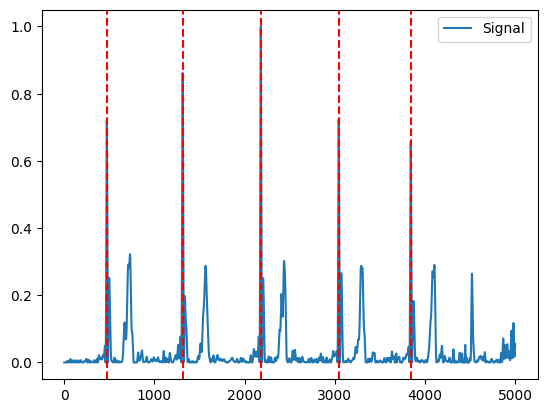

In [ ]:
_, emrich2023 = nk.ecg_peaks(squared, sampling_rate=1200, method="emrich2023", height=0.8, distance=300)
plot = nk.events_plot(emrich2023['ECG_R_Peaks'], squared)

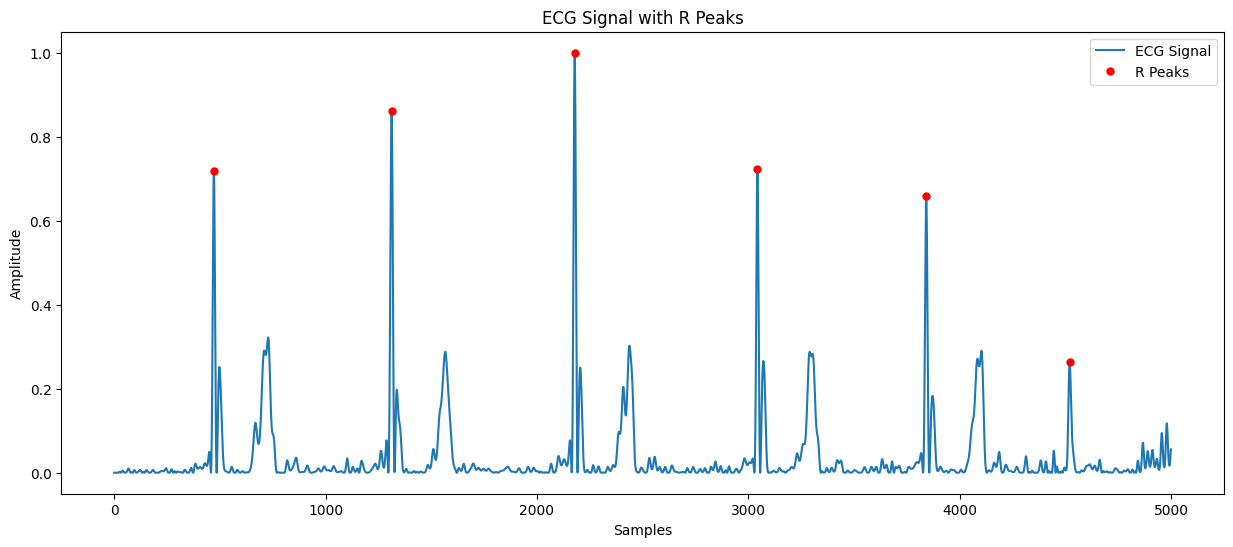

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(squared, label='ECG Signal')

r_peaks = emrich2023['ECG_R_Peaks']
plt.plot(r_peaks, squared[r_peaks], 'ro', markersize=5, label='R Peaks')

plt.title('ECG Signal with R Peaks')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

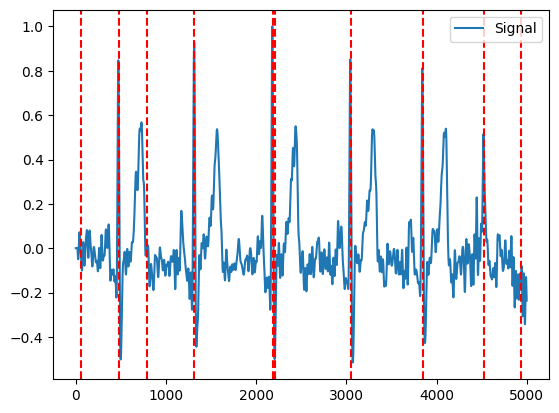

In [ ]:
_, rodrigues2021 = nk.ecg_peaks(filtered, sampling_rate=1200, method="rodrigues2021", height=0.6)
plot = nk.events_plot(rodrigues2021['ECG_R_Peaks'], filtered)

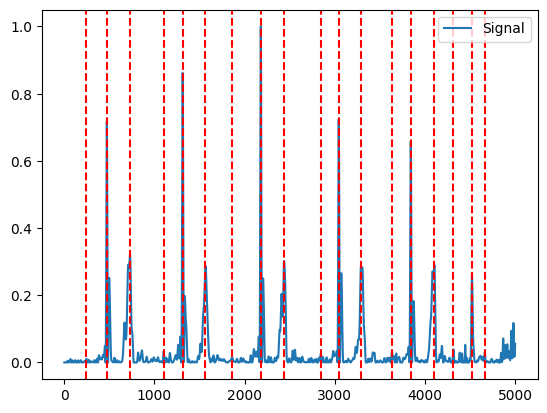

In [ ]:
_, nabian2018 = nk.ecg_peaks(squared, sampling_rate=250, method="nabian2018")
plot=nk.events_plot(nabian2018['ECG_R_Peaks'], squared)

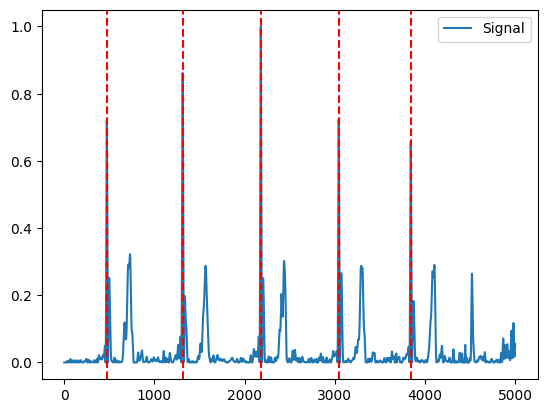

In [ ]:
from scipy.signal import find_peaks

_, nabian2018 = nk.ecg_peaks(squared, sampling_rate=250, method="nabian2018")

r_peaks = nabian2018['ECG_R_Peaks']
filtered_peaks, _ = find_peaks(squared[r_peaks], height=0.6)

plot = nk.events_plot(r_peaks[filtered_peaks], squared)
plt.show()

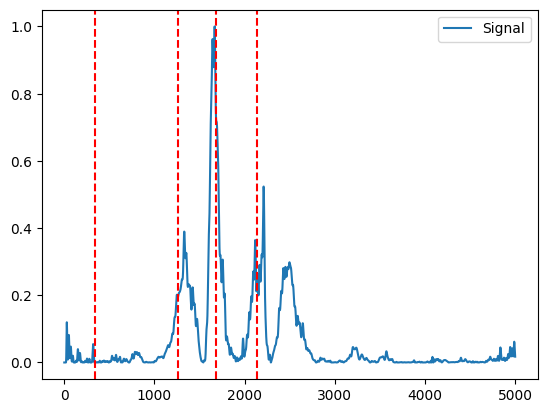

In [ ]:
_, kalidas2017 = nk.ecg_peaks(squared, sampling_rate=700, method="kalidas2017")
plot = nk.events_plot(kalidas2017['ECG_R_Peaks'], squared)

In [ ]:
def derivative(signal):
    result = signal.copy()

    for index in range(len(signal)):
      result[index] = 0

      if (index >= 1):
        result[index] -= 2*signal[index-1]

      if (index >= 2):
        result[index] -= signal[index-2]

      if (index >= 2 and index <= len(signal)-2):
        result[index] += 2*signal[index+1]

      if (index >= 2 and index <= len(signal)-3):
        result[index] += signal[index+2]
        annotation=result[index]

      result[index] = (result[index])/8

    return result

derivatives=derivative(filtered3)

**#103**

In [ ]:
read_file=pd.read_csv('/content/ss3.csv')
ecg_signal2=read_file.iloc[:3000,2].values
print(ecg_signal2)
print(type(ecg_signal2))

ecg_cleaned2=nk.ecg_clean(ecg_signal2, sampling_rate=600, method='biosppy')

[-2.17446711 -2.16869738 -2.17050042 ... -1.79510734 -1.78537092
 -1.81313775]
<class 'numpy.ndarray'>


In [ ]:
read_file=pd.read_csv('/content/ss3.csv')
ecg_signal2=read_file.iloc[:5000,2].values
ecg_cleaned2=nk.ecg_clean(ecg_signal2, sampling_rate=1000, method='vg')

In [ ]:
def band_pass_filter(signal):

    result = None
    sig = signal.copy()

    for i in range(len(signal)):
      sig[i] = signal[i]
      if (i >= 1):
        sig[i] += 2*sig[i-1]
      if (i >= 2):
        sig[i] -= sig[i-2]
      if (i >= 6):
        sig[i] -= 2*signal[i-6]
      if (i >= 12):
        sig[i] += signal[i-12]

    result = sig.copy()

    for i in range(len(signal)):
      result[i] = -1*sig[i]
      if (i >= 1):
        result[i] -= result[i-1]
      if (i >= 16):
        result[i] += 32*sig[i-16]
      if (i >= 32):
        result[i] += sig[i-32]
    max_val = max(max(result),-min(result))
    result = result/max_val
    return result

filtered4=band_pass_filter(ecg_cleaned2)

In [ ]:
def band_pass_filter(signal):

    result = None
    sig = signal.copy()

    for i in range(len(signal)):
      sig[i] = signal[i]
      if (i >= 1):
        sig[i] += 2*sig[i-1]
      if (i >= 2):
        sig[i] -= sig[i-2]
      if (i >= 6):
        sig[i] -= 2*signal[i-6]
      if (i >= 12):
        sig[i] += signal[i-12]

    result = sig.copy()

    for i in range(len(signal)):
      result[i] = -1*sig[i]
      if (i >= 1):
        result[i] -= result[i-1]
      if (i >= 16):
        result[i] += 32*sig[i-16]
      if (i >= 32):
        result[i] += sig[i-32]
    max_val = max(max(result),-min(result))
    result = result/max_val
    return result

filtered5=band_pass_filter(filtered4)

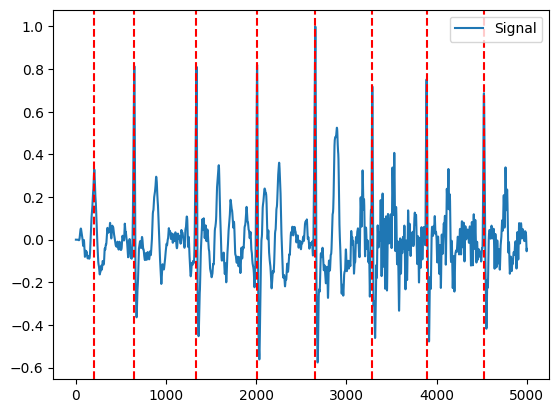

In [ ]:
_, emrich2023 = nk.ecg_peaks(filtered5, sampling_rate=1000, method="emrich2023")
plot = nk.events_plot(emrich2023['ECG_R_Peaks'], filtered5)

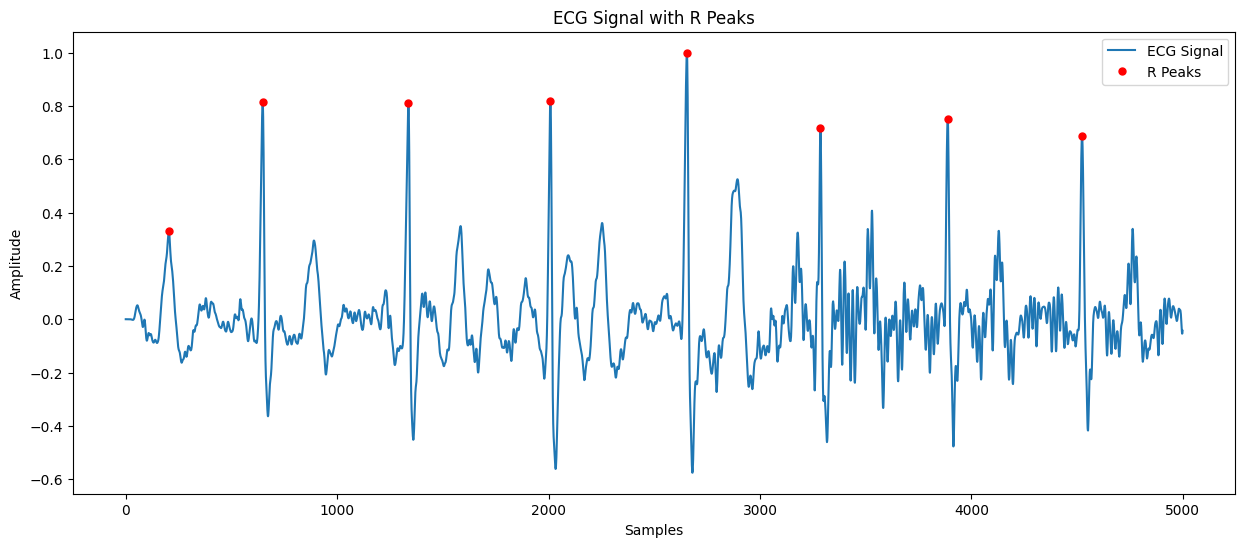

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(filtered5, label='ECG Signal')

r_peaks = emrich2023['ECG_R_Peaks']
plt.plot(r_peaks, filtered5[r_peaks], 'ro', markersize=5, label='R Peaks')

plt.title('ECG Signal with R Peaks')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
def band_pass_filter(signal):

    result = None

    sig = signal.copy()

    for index in range(len(signal)):
      sig[index] = signal[index]

      if (index >= 1):
        sig[index] += 2*sig[index-1]

      if (index >= 2):
        sig[index] -= sig[index-2]

      if (index >= 6):
        sig[index] -= 2*signal[index-6]

      if (index >= 12):
        sig[index] += signal[index-12]

    result = sig.copy()

    for index in range(len(signal)):
      result[index] = -1*sig[index]

      if (index >= 1):
        result[index] -= result[index-1]

      if (index >= 16):
        result[index] += 32*sig[index-16]

      if (index >= 32):
        result[index] += sig[index-32]

    max_val = max(max(result),-min(result))
    result = result/max_val

    return result

filtered2=band_pass_filter(ecg_cleaned2)


In [ ]:
def squaring(signal):
    result = signal.copy()

    for index in range(len(signal)):
      result[index] = signal[index]**2

    return result

squared2=squaring(filtered2)

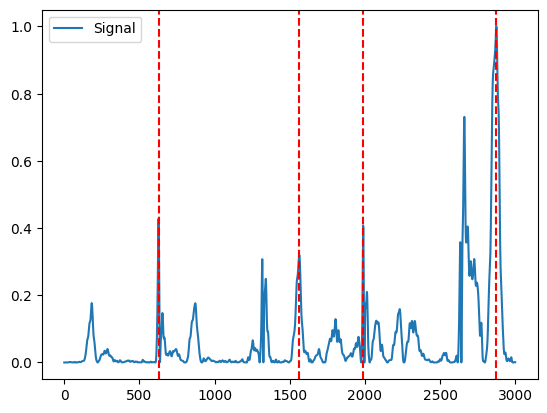

In [ ]:
_, emrich2023 = nk.ecg_peaks(squared2, sampling_rate=1200, method="emrich2023", height=0.8, distance=300)
plot = nk.events_plot(emrich2023['ECG_R_Peaks'], squared2)

In [ ]:
_, nabian2018 = nk.ecg_peaks(squared3, sampling_rate=250, method="nabian2018")
plot=nk.events_plot(nabian2018['ECG_R_Peaks'], squared3)

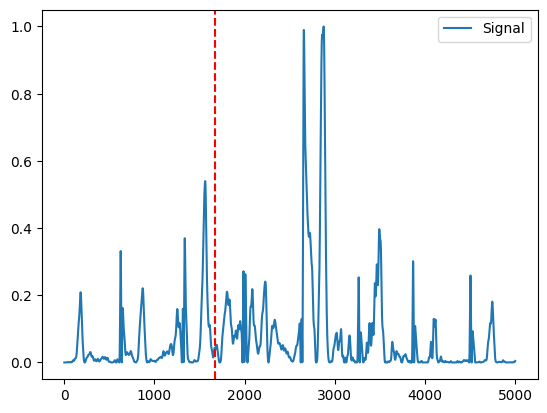

In [ ]:
from scipy.signal import find_peaks

_, nabian2018 = nk.ecg_peaks(squared, sampling_rate=250, method="nabian2018")

r_peaks = nabian2018['ECG_R_Peaks']
filtered_peaks, _ = find_peaks(squared[r_peaks], height=0.6)

plot = nk.events_plot(r_peaks[filtered_peaks], squared2)
plt.show()

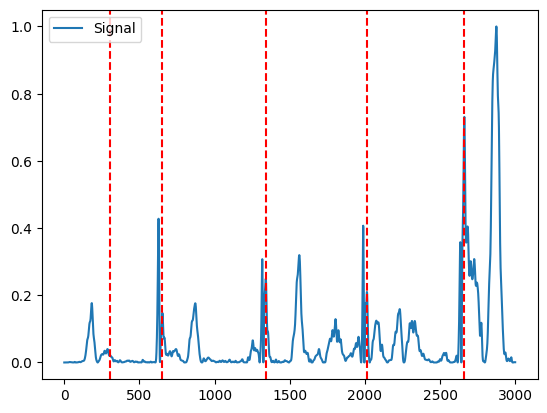

In [ ]:
_, kalidas2017 = nk.ecg_peaks(squared2, sampling_rate=700, method="kalidas2017")
plot = nk.events_plot(kalidas2017['ECG_R_Peaks'], squared2)

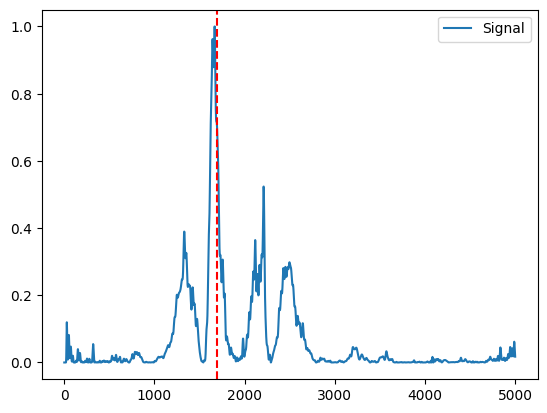

In [ ]:
from scipy.signal import find_peaks

_, nabian2018 = nk.ecg_peaks(squared2, sampling_rate=150, method="nabian2018")

r_peaks = nabian2018['ECG_R_Peaks']
filtered_peaks, _ = find_peaks(squared[r_peaks], height=0.4)

plot = nk.events_plot(r_peaks[filtered_peaks], squared)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, condusion matrix

data=pd.read_csv("/cotent/drive")
dataframe=pd.DataFrame(data)

x=datafram

ST= StandardScaler()
x=ST.transform(dataframe)

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

